# QUESTION 1

## Using given network to perform n-class classification job on the CIFAR 10 dataset

### import libraries

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam

### load dataset

In [ ]:
seed = 7
np.random.seed(seed)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### define CNN model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

### compile and train model

In [ ]:
from keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile and train the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/30
625/625 [==============================] - 398s 634ms/step - loss: 0.6609 - accuracy: 0.7669 - val_loss: 0.7544 - val_accuracy: 0.7411
Epoch 2/30
625/625 [==============================] - 372s 595ms/step - loss: 0.6160 - accuracy: 0.7836 - val_loss: 0.6973 - val_accuracy: 0.7631
Epoch 3/30
625/625 [==============================] - 368s 589ms/step - loss: 0.5707 - accuracy: 0.7978 - val_loss: 0.7312 - val_accuracy: 0.7496
Epoch 4/30
625/625 [==============================] - 373s 596ms/step - loss: 0.5423 - accuracy: 0.8089 - val_loss: 0.6640 - val_accuracy: 0.7739
Epoch 5/30
625/625 [==============================] - 371s 594ms/step - loss: 0.5050 - accuracy: 0.8216 - val_loss: 0.6609 - val_accuracy: 0.7763
Epoch 6/30
625/625 [==============================] - 379s 607ms/step - loss: 0.4740 - accuracy: 0.8324 - val_loss: 0.7147 - val_accuracy: 0.7599
Epoch 7/30
625/625 [==============================] - 380s 608ms/step - loss: 0.4544 - accuracy: 0.8387 - val_loss: 0.6556 -

### evaluation

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

Training Accuracy: 0.8970
Testing Accuracy: 0.7804


## Report the training and testing accuracies.

Training Accuracy: 0.8970

Testing Accuracy: 0.7804

## What are some possible ways to improve the performance of your model?

To improve the performance of the CNN model on the CIFAR-10 dataset, several strategies can be employed. First, experimenting with more complex architectures or pre-trained models like ResNet or EfficientNet can capture more intricate patterns in the data. Incorporating regularization techniques such as dropout and batch normalization helps mitigate overfitting and enhances model generalization. Data augmentation methods, including random rotations, flips, and color adjustments, can artificially expand the training dataset, improving model robustness. Fine-tuning hyperparameters like learning rates, batch sizes, and optimization algorithms (e.g., using AdamW instead of Adam) can also optimize training efficiency. Additionally, employing model ensembling and training with early stopping strategies can further boost performance by leveraging the strengths of multiple models and preventing overfitting.

# QUESTION 2

## Developing LSTM model

### load dataset

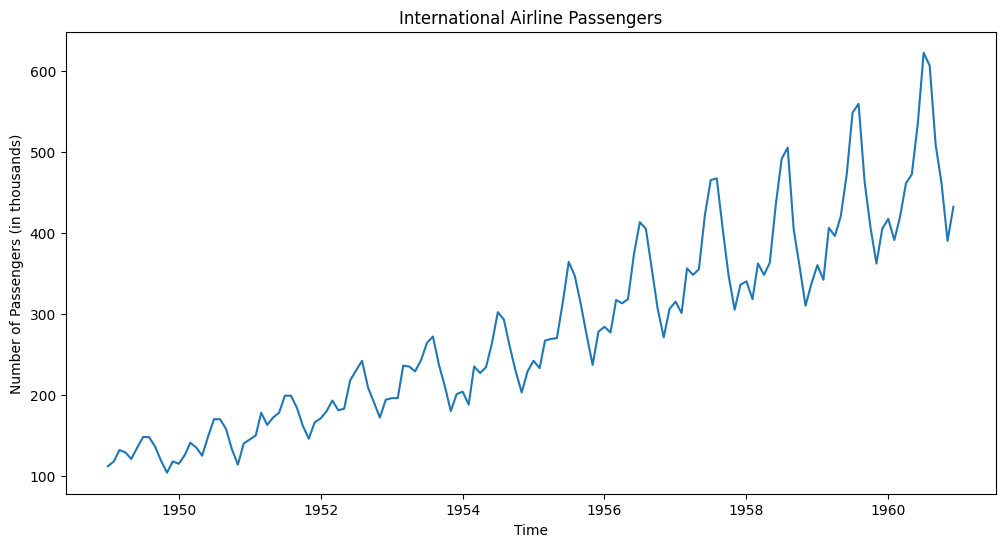

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('international-airline-passengers.csv', delimiter=';', engine='python', header=None, names=['Month', 'Passengers'], skiprows=1)
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.set_index('Month', inplace=True)
data['Passengers'] = data['Passengers'].astype(float)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Passengers'])
plt.title('International Airline Passengers')
plt.xlabel('Time')
plt.ylabel('Number of Passengers (in thousands)')
plt.show()

### preprocess data

In [89]:
data=data.to_numpy()

In [90]:
from sklearn.preprocessing import MinMaxScaler
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(data)

### split into test and train

In [91]:
def create_dataset(data, time_window=1):
    X, y = [], []
    for i in range(len(data) - time_window):
        X.append(data[i:(i + time_window), 0])
        y.append(data[i + time_window, 0])
    return np.array(X), np.array(y)

time_window = 12
X, y = create_dataset(scaled_data, time_window)

# Split the data into training and test sets
split_index = int(len(X) * 0.7)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape the data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

### training

In [92]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2, validation_split=0.1)

Epoch 1/50
82/82 - 6s - loss: 0.0092 - val_loss: 0.0277 - 6s/epoch - 72ms/step
Epoch 2/50
82/82 - 1s - loss: 0.0062 - val_loss: 0.0142 - 598ms/epoch - 7ms/step
Epoch 3/50
82/82 - 1s - loss: 0.0066 - val_loss: 0.0142 - 595ms/epoch - 7ms/step
Epoch 4/50
82/82 - 1s - loss: 0.0056 - val_loss: 0.0151 - 630ms/epoch - 8ms/step
Epoch 5/50
82/82 - 1s - loss: 0.0048 - val_loss: 0.0142 - 617ms/epoch - 8ms/step
Epoch 6/50
82/82 - 1s - loss: 0.0055 - val_loss: 0.0201 - 625ms/epoch - 8ms/step
Epoch 7/50
82/82 - 1s - loss: 0.0048 - val_loss: 0.0128 - 628ms/epoch - 8ms/step
Epoch 8/50
82/82 - 1s - loss: 0.0046 - val_loss: 0.0181 - 589ms/epoch - 7ms/step
Epoch 9/50
82/82 - 1s - loss: 0.0053 - val_loss: 0.0149 - 584ms/epoch - 7ms/step
Epoch 10/50
82/82 - 1s - loss: 0.0040 - val_loss: 0.0203 - 624ms/epoch - 8ms/step
Epoch 11/50
82/82 - 1s - loss: 0.0042 - val_loss: 0.0229 - 613ms/epoch - 7ms/step
Epoch 12/50
82/82 - 1s - loss: 0.0035 - val_loss: 0.0142 - 606ms/epoch - 7ms/step
Epoch 13/50
82/82 - 1s - lo

### forecasting

2/2 [==============================] - 0s 7ms/step


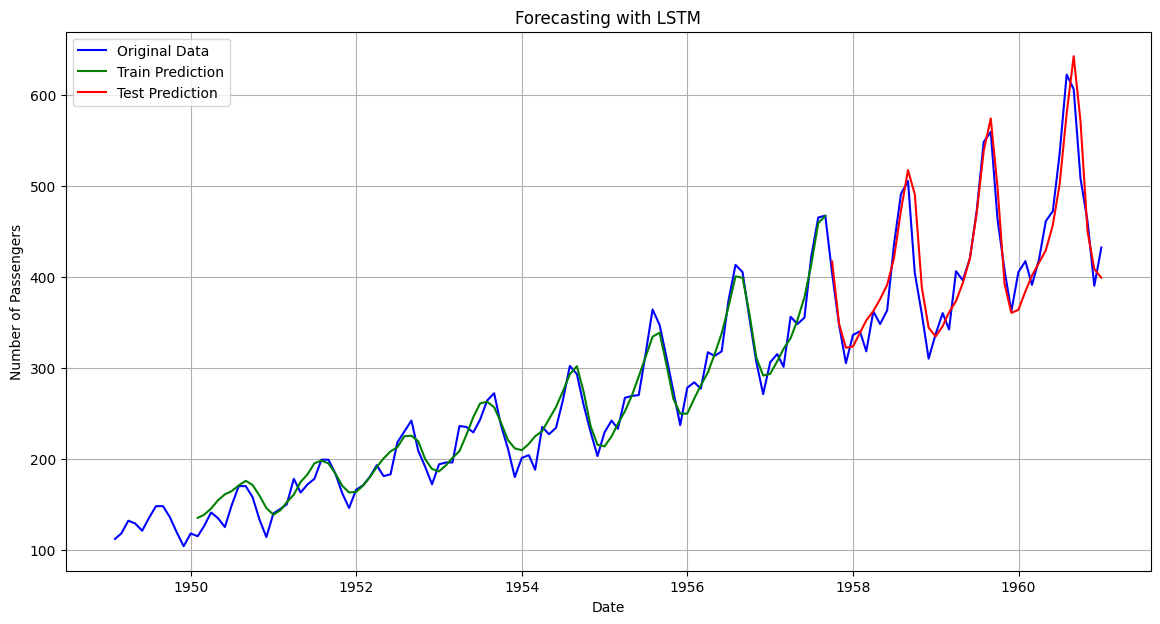

In [93]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

dates = pd.date_range(start='1949-01-01', periods=len(data), freq='M')

train_index = np.arange(time_window, len(y_train) + time_window)
test_index = np.arange(len(y_train) + time_window, len(y_train) + time_window + len(test_predictions))
train_index = train_index[train_index < len(dates)]
test_index = test_index[test_index < len(dates)]

# Convert indices to dates
train_dates = dates[train_index]
test_dates = dates[test_index]

plt.figure(figsize=(14, 7))

# Plot original data
plt.plot(dates, data.flatten(), label='Original Data', color='blue')

# Plot training predictions
plt.plot(train_dates, train_predictions[:len(train_dates)], label='Train Prediction', color='green')

# Plot test predictions
plt.plot(test_dates, test_predictions[:len(test_dates)], label='Test Prediction', color='red')


plt.title('Forecasting with LSTM')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [94]:
# Estimate model performance
from sklearn.metrics import mean_squared_error
train_score = mean_squared_error(y_train, train_predictions, squared=False)
test_score = mean_squared_error(y_test, test_predictions, squared=False)
print(f'Train Score: {train_score:.2f} RMSE')
print(f'Test Score: {test_score:.2f} RMSE')

Train Score: 14.90 RMSE
Test Score: 27.78 RMSE



## How does the vanishing and exploding gradient problems affect learning and what can we do in general to avoid this issue?



Vanishing Gradients cause learning to be slow or halted by reducing the magnitude of gradients, particularly in deep networks and Exploding Gradients lead to unstable training by causing gradients to become excessively large, making the training process unstable. To avoid Vanishing Gradients, we can use activation functions with better gradient properties, batch normalization, and gradient clipping. To avoid Exploding Gradients, we can also use batch normalization and gradient clipping as well as regularization techniques and residual connections.

## “We can use traditional MLPs to learn multi-scale feature representations on image data across a large number of different classes” – do you agree with this statement? Explain your reasoning. What kind of neural network model would you prefer to use if you were to do this task and why?

I do not agree with this statement. Traditional MLPs are not effective for this task due to their lack of spatial awareness and inefficiency in handling multi-scale features. They treat input data as a flat vector and do not capture spatial hierarchies. I would prefer to use CNNs (Convolutional Neural Networks) if I were to do this task because they are designed to address these issues; they can learn hierarchical feature representations and handle large-scale image data.